##STEP-1: DATASET LOADING

In [1]:
#IMPORT THE NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LOAD THE DATASET USING PANDAS
df=pd.read_csv("/content/Sample - Superstore.csv")

#PRINT FIRST 5 ROWS OF THE DATASET
print (df.head(5))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  06-12-2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [3]:
#PRINT LAST 5 ROWS OF THE DATASET
print(df.tail(5))

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017  03-03-2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017  03-03-2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017  03-03-2017  Standard Class   
9993    9994  CA-2017-119914  05-04-2017  05-09-2017    Second Class   

     Customer ID     Customer Name   Segment        Country         City  ...  \
9989    TB-21400  Tom Boeckenhauer  Consumer  United States        Miami  ...   
9990    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9991    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9992    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9993    CC-12220      Chris Cortes  Consumer  United States  Westminster  ...   

     Postal Code  Region       Product ID         Category Sub-Category  \
9989 

In [4]:
#Check the following:
#Shape of the dataset
#Column names
#Data types using info()
print(f"1. The shape of the data is: {df.shape}")
print(f"2. The columns of the data are:{df.columns}")
print(f"3. The data structure and data types are described as:")
print(df.info())

1. The shape of the data is: (9994, 21)
2. The columns of the data are:Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
3. The data structure and data types are described as:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country     

##STEP-2: DATA CLEANING AND PREPROCESSING


In [5]:
#IDENTIFYING MISSING VALUES
print(df.isnull().sum())

#There are no missing values as seen from the output

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [6]:
#CHECK FOR DUPLICATE RECORDS
print(f"The number of duplicate records are: {df.duplicated().sum()}")

The number of duplicate records are: 0


In [7]:
#PRINT DATE AND NUMERICAL COLUMNS.
print(f"The date columns are: {df.columns[df.columns.str.contains('Date')]}")
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(f"The numerical columns are:{numerical_columns}")

The date columns are: Index(['Order Date', 'Ship Date'], dtype='object')
The numerical columns are:Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


In [8]:
#Convert data types where required:
#1.date columns to datetime
#2.Convert numerical columns to int/float (Numerical columns are already in int/float for our data)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=False)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=False)
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [9]:
#STANDARDIZE COLUMN NAMES
df.columns = df.columns.str.upper()
print("Updated column names:")
print(df.columns)

Updated column names:
Index(['ROW ID', 'ORDER ID', 'ORDER DATE', 'SHIP DATE', 'SHIP MODE',
       'CUSTOMER ID', 'CUSTOMER NAME', 'SEGMENT', 'COUNTRY', 'CITY', 'STATE',
       'POSTAL CODE', 'REGION', 'PRODUCT ID', 'CATEGORY', 'SUB-CATEGORY',
       'PRODUCT NAME', 'SALES', 'QUANTITY', 'DISCOUNT', 'PROFIT'],
      dtype='object')


#STEP-3: EXPLORATORY DATA ANALYSIS

In [10]:
##Perform EDA using pandas operations.



#• Identify top or bottom performing categories
 ##

In [11]:
#Display Summary Statistics
df.describe()

,ROW ID,ORDER DATE,SHIP DATE,POSTAL CODE,SALES,QUANTITY,DISCOUNT,PROFIT
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [15]:
#Finding Value counts for categorical columns
print(df['CATEGORY'].value_counts())
print(df['REGION'].value_counts())
print(df['SEGMENT'].value_counts())
print(df['SHIP MODE'].value_counts())

CATEGORY
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64
REGION
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64
SEGMENT
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64
SHIP MODE
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


In [13]:
#Group-by analysis (e.g., average, total, count)

In [16]:
category_summary = df.groupby('CATEGORY')[['SALES','PROFIT']].sum().reset_index()
category_summary


,CATEGORY,SALES,PROFIT
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


In [17]:
region_summary = df.groupby('REGION')[['SALES','PROFIT']].sum().reset_index()
region_summary


,REGION,SALES,PROFIT
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


In [14]:
#category_analysis = df.groupby('CATEGORY').agg(
    #Sales_Sum=('SALES', 'sum'),
    #Sales_Mean=('SALES', 'mean'),
    #Sales_Count=('SALES', 'count'),
    #Profit_Sum=('PROFIT', 'sum'),
    #Profit_Mean=('PROFIT', 'mean'),
    #Profit_Count=('PROFIT', 'count')
)

#print("Aggregated Sales and Profit by Category:")
#print(category_analysis)

Aggregated Sales and Profit by Category:
                   Sales_Sum  Sales_Mean  Sales_Count   Profit_Sum  \
CATEGORY                                                             
Furniture        741999.7953  349.834887         2121   18451.2728   
Office Supplies  719047.0320  119.324101         6026  122490.8008   
Technology       836154.0330  452.709276         1847  145454.9481   

                 Profit_Mean  Profit_Count  
CATEGORY                                    
Furniture           8.699327          2121  
Office Supplies    20.327050          6026  
Technology         78.752002          1847  


In [19]:
# Correlation analysis between numerical columns
df[['SALES','QUANTITY','DISCOUNT','PROFIT']].corr()


,SALES,QUANTITY,DISCOUNT,PROFIT
SALES,1.000000,0.200795,-0.028190,0.479064
QUANTITY,0.200795,1.000000,0.008623,0.066253
DISCOUNT,-0.028190,0.008623,1.000000,-0.219487
PROFIT,0.479064,0.066253,-0.219487,1.000000


In [ ]:
# where is top or bottom performing categories??

#Step 4: Data Visualization


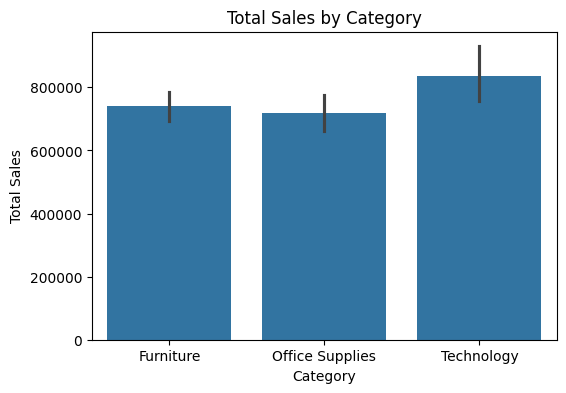

In [20]:
#Bar Chart – Category-wise comparison

plt.figure(figsize=(6,4))
sns.barplot(x='CATEGORY', y='SALES', data=df, estimator=sum)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


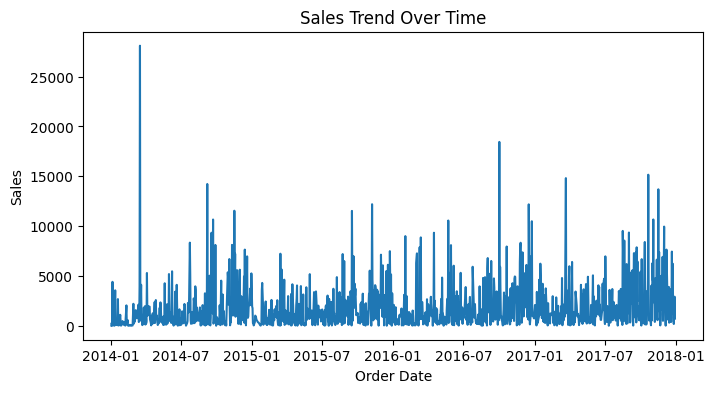

In [21]:
#Line Chart – Trend Analysis
df_time = df.groupby('ORDER DATE')['SALES'].sum().reset_index()

plt.figure(figsize=(8,4))
plt.plot(df_time['ORDER DATE'], df_time['SALES'])
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()


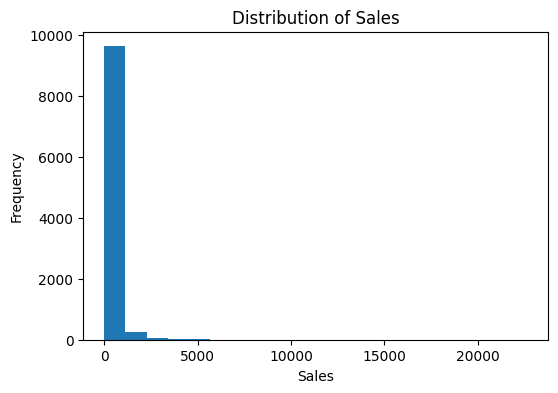

In [22]:
 # Histogram – Distribution of a numerical column
 plt.figure(figsize=(6,4))
plt.hist(df['SALES'], bins=20)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


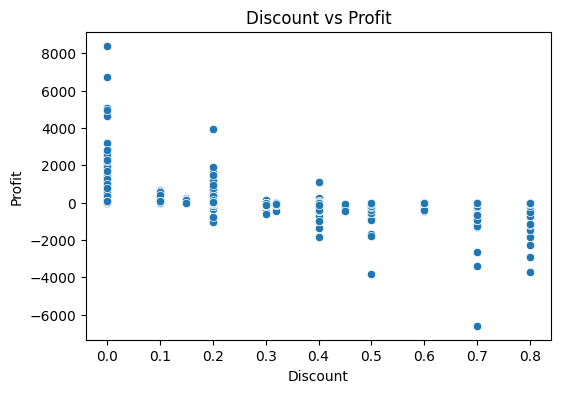

In [23]:
#Scatter Plot – Relationship between two variables
plt.figure(figsize=(6,4))
sns.scatterplot(x='DISCOUNT', y='PROFIT', data=df)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


#Step 5: Insights and Interpretation
1️⃣ Technology category generates the highest sales and profit, indicating strong demand and better margins compared to Furniture and Office Supplies.

2️⃣ The Consumer segment contributes the most to overall sales, showing it is the primary revenue driver for the business.

3️⃣ Higher discounts are often associated with lower or negative profits, suggesting excessive discounting reduces profitability.

4️⃣ Sales show fluctuations over time, indicating seasonal demand patterns rather than steady growth.

5️⃣ The Central region records lower profit compared to sales, highlighting possible cost or pricing inefficiencies in that region.
